<a href="https://colab.research.google.com/github/Sriraj-Penjerla/Sriraj-GlucoSense-Infy-Nov24/blob/main/Glucosense_Infy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data

In [80]:
data=pd.read_csv('/content/diabetes_data.csv')
data.head(5)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,16,Male,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,25,Female,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1
2,25,Male,1,1,0,0,1,1,1,1,0,1,0,0,1,0,1
3,26,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,27,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

# Checking for duplicates

In [82]:
duplicates = data[data.duplicated()]
print("Duplicate rows:\n", duplicates)

Duplicate rows:
      age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
5     27    Male         0           0                   0         0   
6     27    Male         0           0                   0         0   
7     27    Male         0           0                   0         0   
8     27    Male         0           0                   0         0   
9     27    Male         0           0                   0         0   
..   ...     ...       ...         ...                 ...       ...   
512   72    Male         1           0                   0         0   
513   72    Male         1           0                   0         0   
514   72    Male         1           0                   0         0   
517   85    Male         1           1                   1         1   
519   90  Female         0           1                   1         0   

     polyphagia  genital_thrush  visual_blurring  itching  irritability  \
5             0               0            

# Removing duplicates

In [83]:
data.drop_duplicates(inplace=True)

In [84]:
data.shape

(251, 17)

# EDA

### Distribution of age

<Axes: title={'center': 'age'}, ylabel='Frequency'>

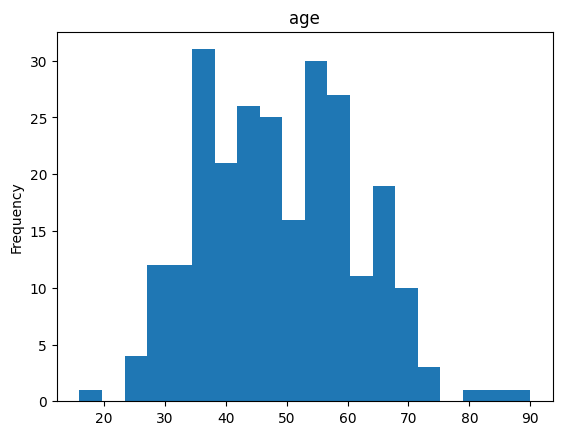

In [85]:
data['age'].plot(kind='hist', bins=20, title='age')



*   The ages in the histogram are mostly clustered around a central value.
*   The peak of the distribution appears to be around the 50-60 age range. This suggests that the majority of individuals in the dataset are in their mid-50s.
- The distribution is relatively wide, with ages ranging from approximately 15 to 85. This indicates a fair amount of variability in the ages of the individuals.
- More people who are having diabetes are around 55 .


### percentages based on gender

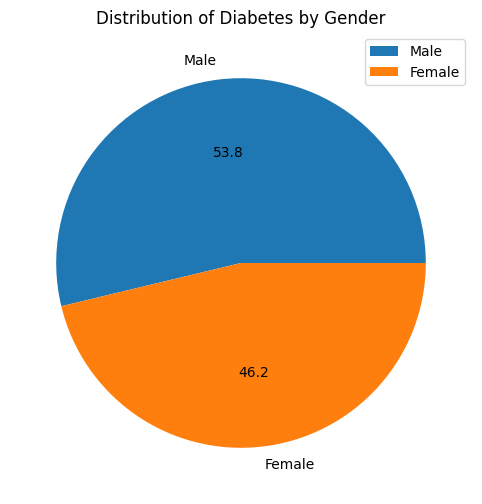

In [86]:
gender_diabetes_counts = data[data['class'] == 1]['gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_diabetes_counts, labels=["Male","Female"], autopct='%1.1f')
plt.title('Distribution of Diabetes by Gender')
plt.legend()
plt.show()

 - A significantly larger proportion of individuals diagnosed with diabetes are male. The chart indicates that approximately 53.8% of the diabetes cases are among males.

 - Females account for the remaining 46.2% of diabetes cases.

 - There may be underlying biological factors that make males more susceptible to developing diabetes.

 - Differences in lifestyle factors, such as diet, exercise habits, and stress levels, between genders could contribute to the disparity.

### Complete comparison of features

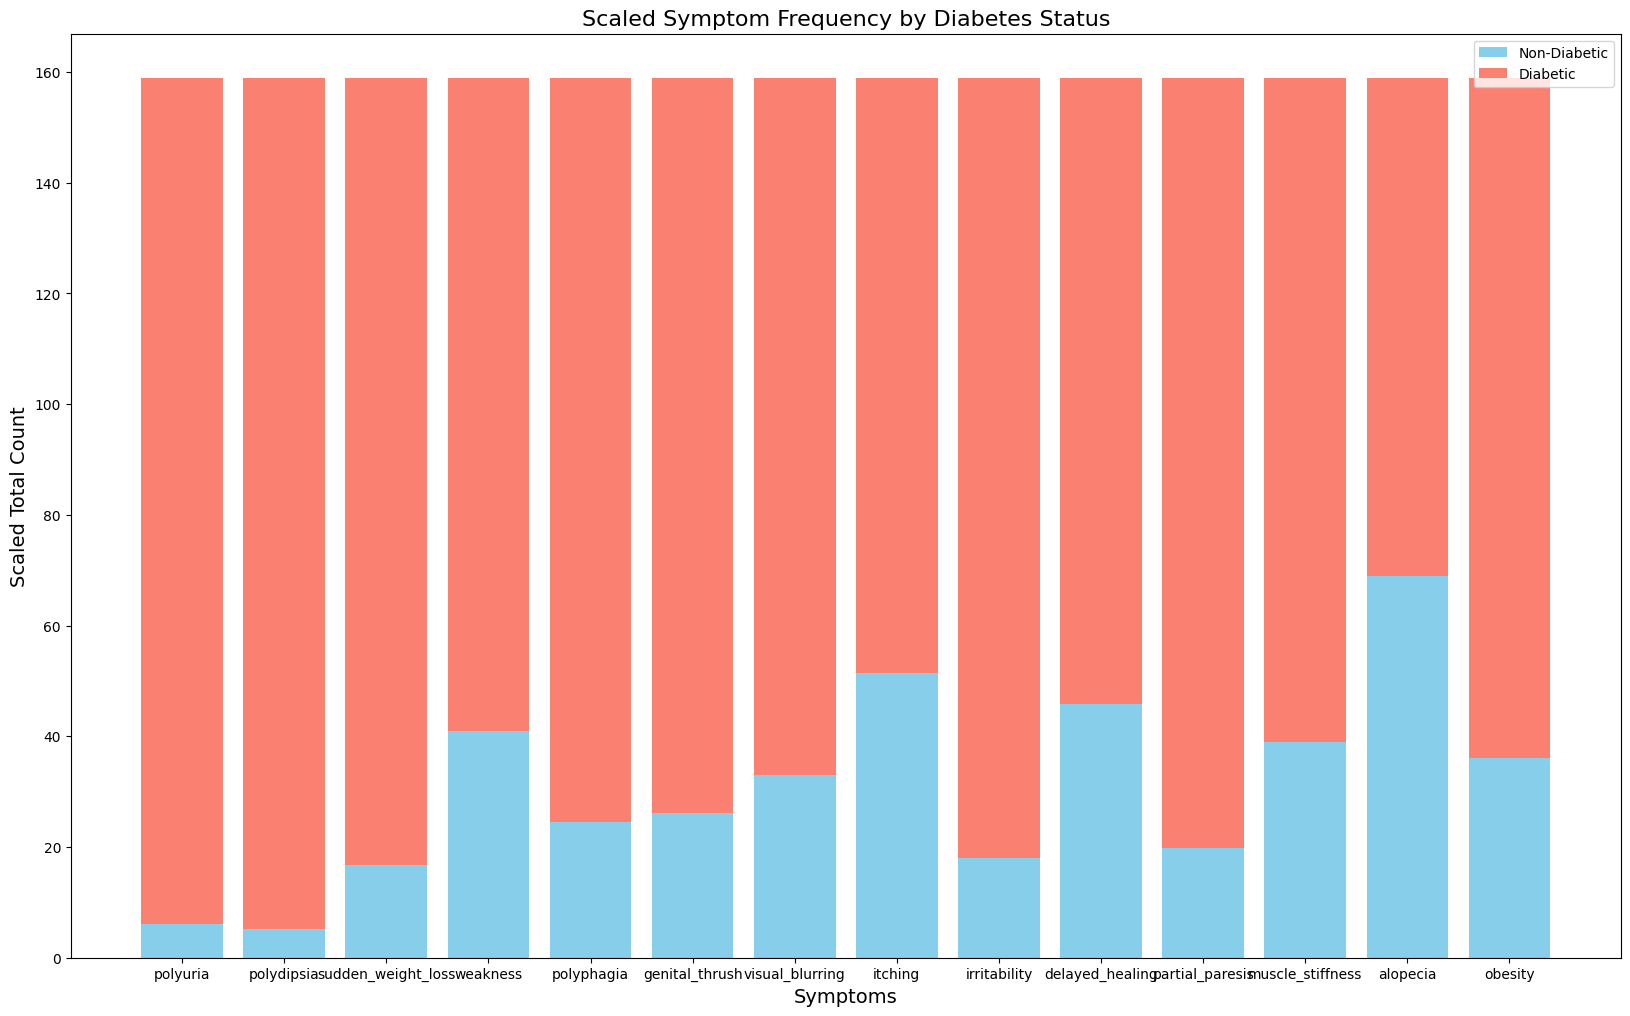

In [87]:
df=data
symptoms = df.columns[2:-1]
count_0 = df[df['class'] == 0][symptoms].sum(axis=0)
count_1 = df[df['class'] == 1][symptoms].sum(axis=0)
total = count_0 + count_1
max_total = total.max()
count_0_scaled = count_0 / total * max_total
count_1_scaled = count_1 / total * max_total
plt.figure(figsize=(20, 12))
plt.bar(symptoms, count_0_scaled, label='Non-Diabetic', color='skyblue')
plt.bar(symptoms, count_1_scaled, bottom=count_0_scaled, label='Diabetic', color='salmon')
plt.xlabel('Symptoms', fontsize=14)
plt.ylabel('Scaled Total Count', fontsize=14)
plt.title('Scaled Symptom Frequency by Diabetes Status', fontsize=16)
plt.legend()
plt.show()

### **The chart visually compares the frequency of various symptoms in diabetic and non-diabetic patients. It's evident that many of these symptoms are more prevalent in diabetic patients.**

- **Polyuria and Polydipsia**: Both symptoms are significantly higher in diabetic patients. This is consistent with the understanding of diabetes as a condition characterized by excessive urination and thirst.

- **Sudden Weight Loss and Weakness**: These symptoms are also more prominent in diabetic patients, suggesting a potential link to the metabolic disturbances associated with the disease.

- **Polyphagia and Itching**: These symptoms show a moderate increase in diabetic patients compared to non-diabetic ones. This could be related to the body's attempt to compensate for increased glucose levels or other metabolic imbalances.
- **Partial Paresis and Muscle Stiffness**: These symptoms are more prevalent in diabetic patients, potentially indicating neurological complications associated with diabetes.
- **Alopecia and Obesity**: While these symptoms show some difference between the two groups, the difference is less pronounced compared to other symptoms.

### Correlation matrix

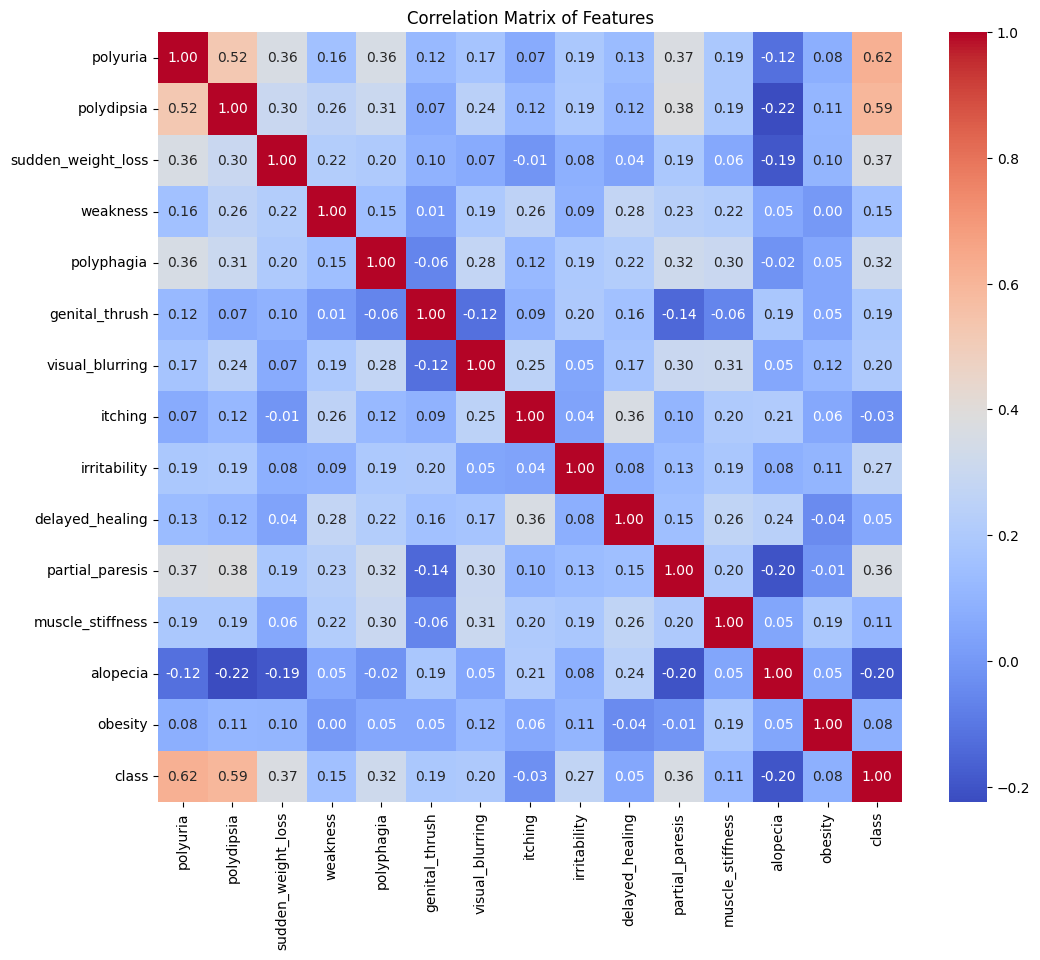

In [88]:
import seaborn as sns
df=data.drop(['age','gender'],axis=1,inplace=False)
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

### **Insights from the Correlation Matrix**

**Strong Correlations with Diabetes**:
- Polyuria
- polydipsia
- sudden weight loss
- weakness
- polyphagia

**Moderate Correlations:**
- Genital thrush
- visual blurring
- itching
- irritability
- delayed healing

**Weak Correlations:**
- Alopecia
- obesity

Overall, the correlation matrix provides valuable insights into the relationships between various symptoms and diabetes.

# **Further Analysis of highly correlated data**

### Polyuria distribution

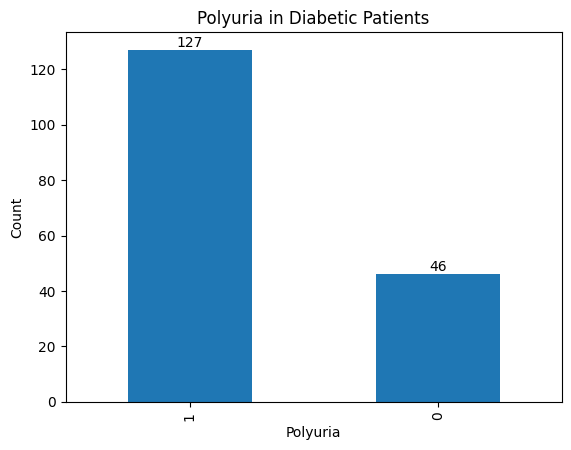

In [89]:
polyuria_diabetes = data[data['class'] == 1]['polyuria'].value_counts()
polyuria_diabetes.plot(kind='bar', title='Polyuria in Diabetic Patients')
plt.xlabel('Polyuria')
plt.ylabel('Count')

for i, v in enumerate(polyuria_diabetes):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

- The graph indicates a clear association between diabetes and polyuria.
A significant portion of diabetic patients (243 out of 320) exhibit polyuria.
- This suggests that polyuria is a common symptom of diabetes in this dataset.
- The majority of diabetic patients in this dataset experience polyuria.
- Only a smaller proportion (77 out of 320) do not have polyuria.

### Considering only positive diabetic data

In [90]:
db_data = data[data['class'] == 1 ] # only diabetic data

### Polyuria in diabetic patients

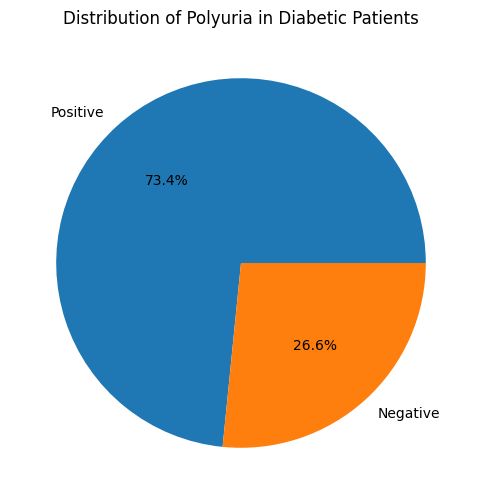

In [91]:
polyuria_diabetes = db_data[db_data['class'] == 1]['polyuria'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(polyuria_diabetes, labels=["Positive","Negative"], autopct='%1.1f%%')
plt.title('Distribution of Polyuria in Diabetic Patients')
plt.show()

- 73.4% of diabetic patients exhibit polyuria, indicating a strong association between the two.
- Polyuria is a common symptom of diabetes and can be a valuable diagnostic indicator.
- Further research is needed to explore the underlying mechanisms and clinical implications of this association.

### polydipsia in diabetic patients

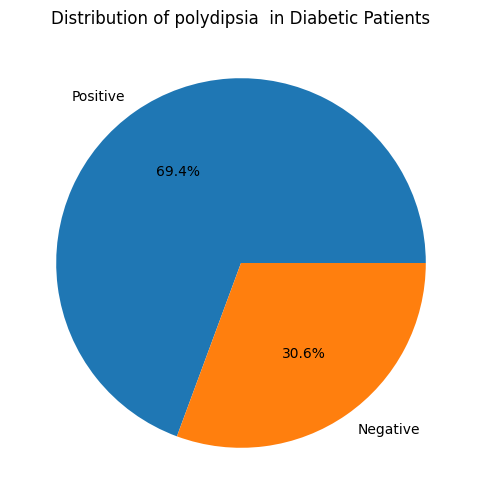

In [92]:
poly = db_data[db_data['class'] == 1]['polydipsia'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(poly, labels=["Positive","Negative"], autopct='%1.1f%%')
plt.title('Distribution of polydipsia  in Diabetic Patients')
# plt.legend()
plt.show()

- A significant number of diabetic patients, around 69.4%, experience excessive thirst or polydipsia.
- This suggests a strong link between diabetes and increased thirst.
- Polydipsia can be a key symptom in diagnosing diabetes early on.
- research is necessary to better understand why diabetes causes excessive thirst and how this knowledge can be used to improve patient care.

### polyphagia in diabetic patients

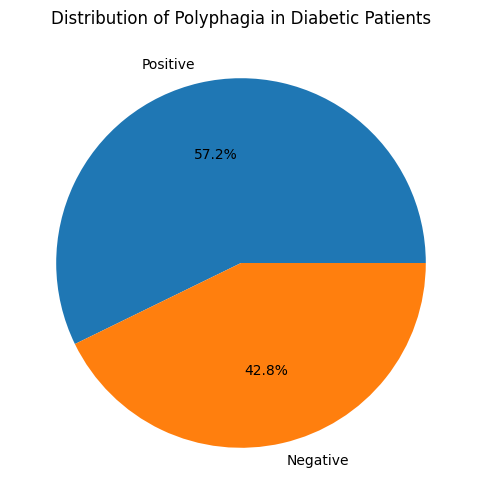

In [93]:
polyphagia = db_data[db_data['class'] == 1]['polyphagia'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(polyphagia, labels=["Positive","Negative"], autopct='%1.1f%%')
plt.title('Distribution of Polyphagia in Diabetic Patients')
plt.show()

- Nearly 60% of diabetic patients experience increased appetite or polyphagia.
- This suggests a strong link between diabetes and excessive hunger.
- Polyphagia can be a valuable clue in diagnosing diabetes early on.

### sudden_weight_loss in diabetic patients

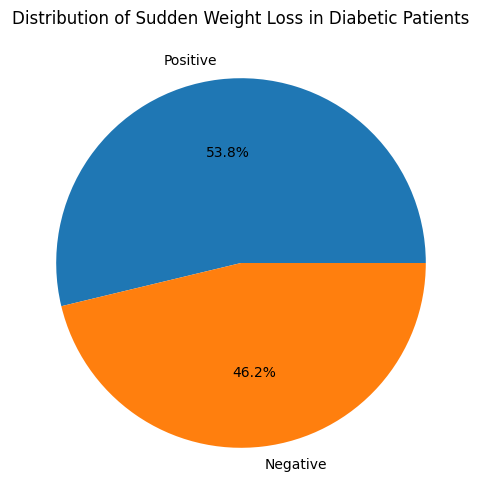

In [94]:
sudden_weight_loss = db_data[db_data['class'] == 1]['sudden_weight_loss'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sudden_weight_loss, labels=["Positive","Negative"], autopct='%1.1f%%')
plt.title('Distribution of Sudden Weight Loss in Diabetic Patients')
plt.show()

- Over half (58.7%) of diabetic patients experience sudden weight loss.
- This suggests a strong link between diabetes and unexplained weight loss.
- Sudden weight loss can be a warning sign of diabetes, especially when accompanied by other symptoms.

### weakness in diabetic patients

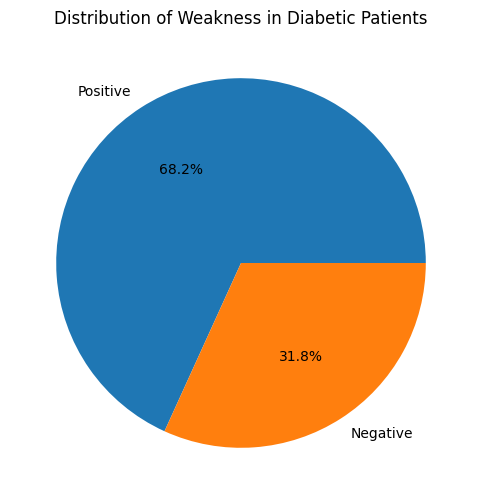

In [95]:
weakness = data[data['class'] == 1]['weakness'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(weakness, labels=["Positive","Negative"], autopct='%1.1f%%')
plt.title('Distribution of Weakness in Diabetic Patients')
plt.show()

- Around 68.1% of diabetic patients experience weakness.
- This suggests a strong link between diabetes and feelings of weakness.
- Weakness can be a symptom of diabetes, especially in cases of poor blood sugar control.

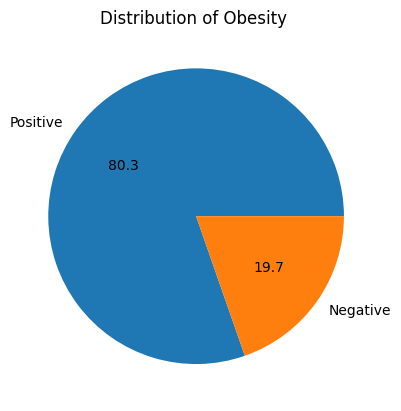

In [96]:
# obesity vs the diabetes
oCount=data[data['class']==1]['obesity'].value_counts()
plt.pie(oCount,labels=["Positive","Negative"],autopct='%1.1f')
plt.title("Distribution of Obesity ")
plt.show()

['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class']


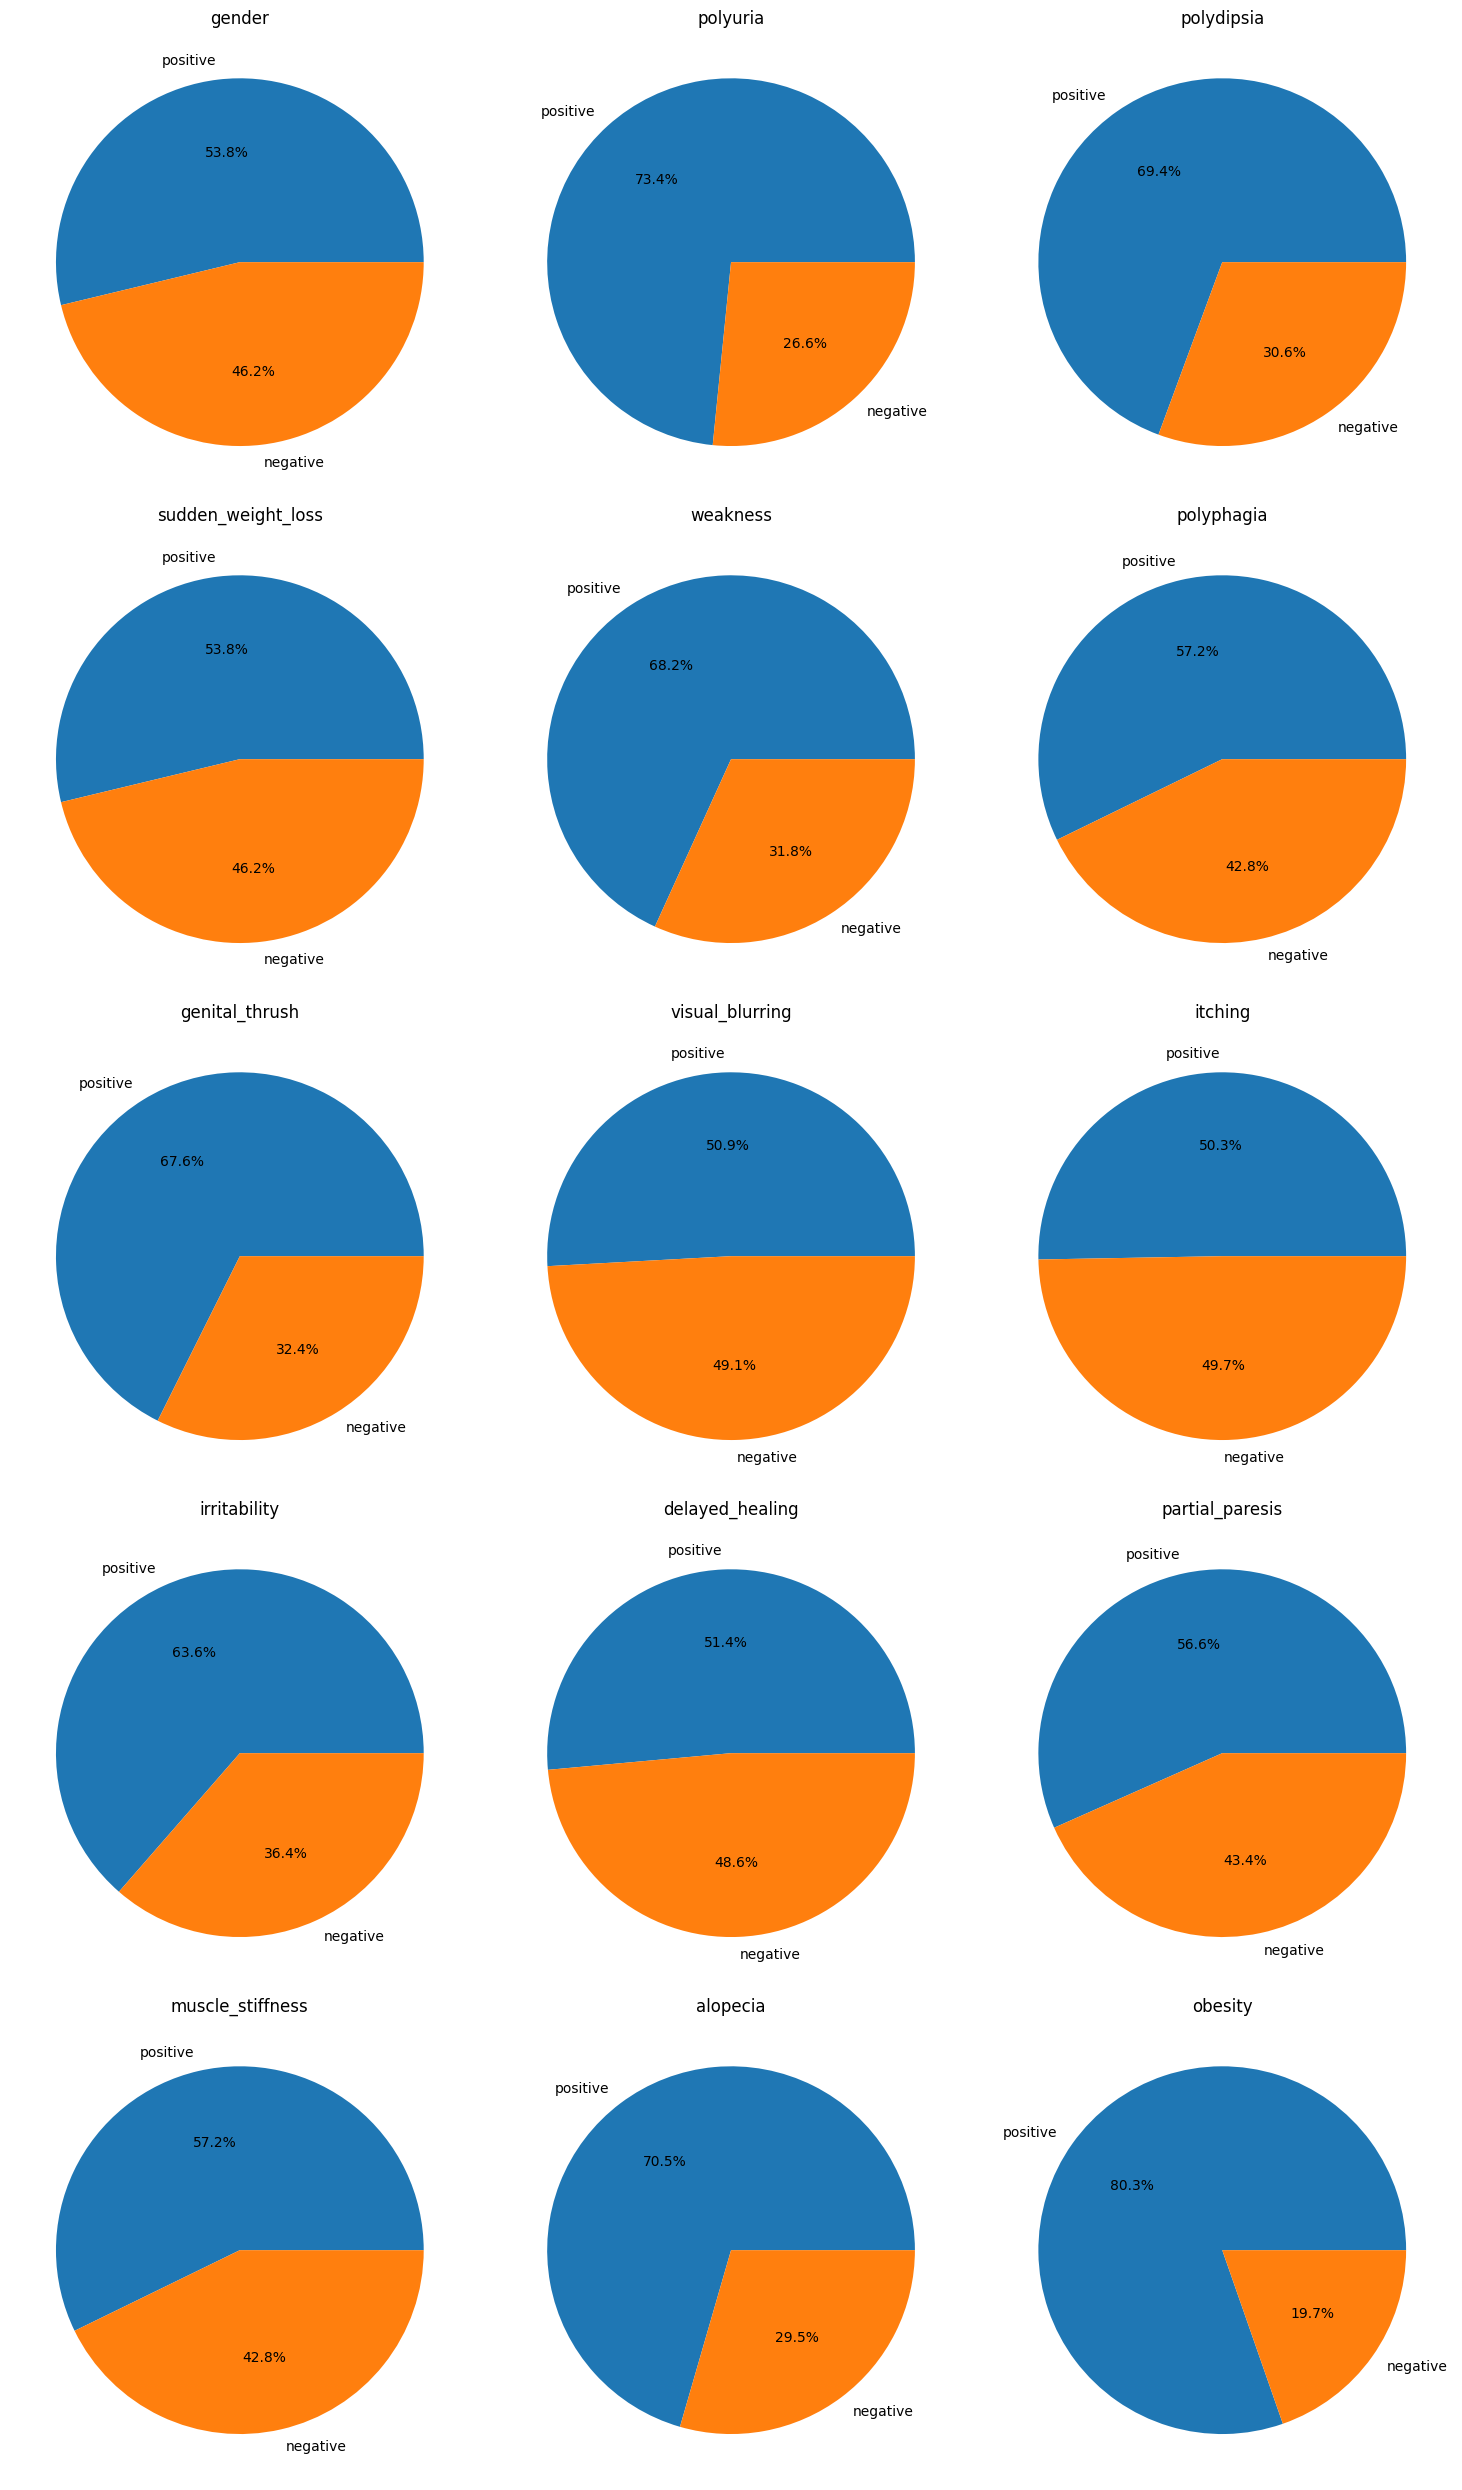

In [97]:
cols = data.columns
cols = list(cols)
print(cols)
cols.remove('class')
cols.remove('age')
n_cols = 3
n_rows = -(-len(cols) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, c in enumerate(cols):
    count = data[data['class'] == 1][c].value_counts()
    axes[i].pie(count,labels=["positive","negative"], autopct="%1.1f%%")
    axes[i].set_title(c)
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# Dimensionality Reduction

In [98]:
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})

In [99]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['class'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)


explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio of each component:")
print(explained_variance)
print("\nTotal Explained Variance (Sum):", sum(explained_variance))


Explained Variance Ratio of each component:
[0.21038589 0.13269542 0.09048875 0.07433586 0.06144148 0.05270025
 0.05208499 0.04818633]

Total Explained Variance (Sum): 0.7223189911625029


Dimentionality Reduction is not useful in this scenario. Conducting PCA does the dimentionality reduction but takes away the main motive of the data because we will not have any original data features in the modified components.

# Feature Selection

In [100]:
correlation_matrix = data.corr()
target_corr = correlation_matrix['class'].sort_values(ascending=False)
print(target_corr)

class                 1.000000
polyuria              0.620992
polydipsia            0.594615
sudden_weight_loss    0.372554
partial_paresis       0.360288
polyphagia            0.316808
irritability          0.268806
visual_blurring       0.199228
genital_thrush        0.191117
weakness              0.150254
muscle_stiffness      0.113890
obesity               0.083167
age                   0.052635
delayed_healing       0.048976
itching              -0.026411
alopecia             -0.198024
gender               -0.309413
Name: class, dtype: float64


Chi-Square Test Results for All Columns:
               Feature  Chi2 Score       p-value
2             polyuria   45.890026  1.250812e-11
3           polydipsia   44.903006  2.070398e-11
4   sudden_weight_loss   20.403086  6.272856e-06
12     partial_paresis   18.043260  2.159418e-05
6           polyphagia   13.449259  2.451029e-04
10        irritability   13.006198  3.104617e-04
1               gender    8.712006  3.161212e-03
7       genital_thrush    6.720759  9.529705e-03
14            alopecia    6.313391  1.198294e-02
8      visual_blurring    5.556841  1.840861e-02
5             weakness    2.077010  1.495328e-01
13    muscle_stiffness    1.984555  1.589113e-01
15             obesity    1.431754  2.314784e-01
11     delayed_healing    0.302236  5.824842e-01
9              itching    0.086492  7.686849e-01
0                  age    0.044684  8.325866e-01


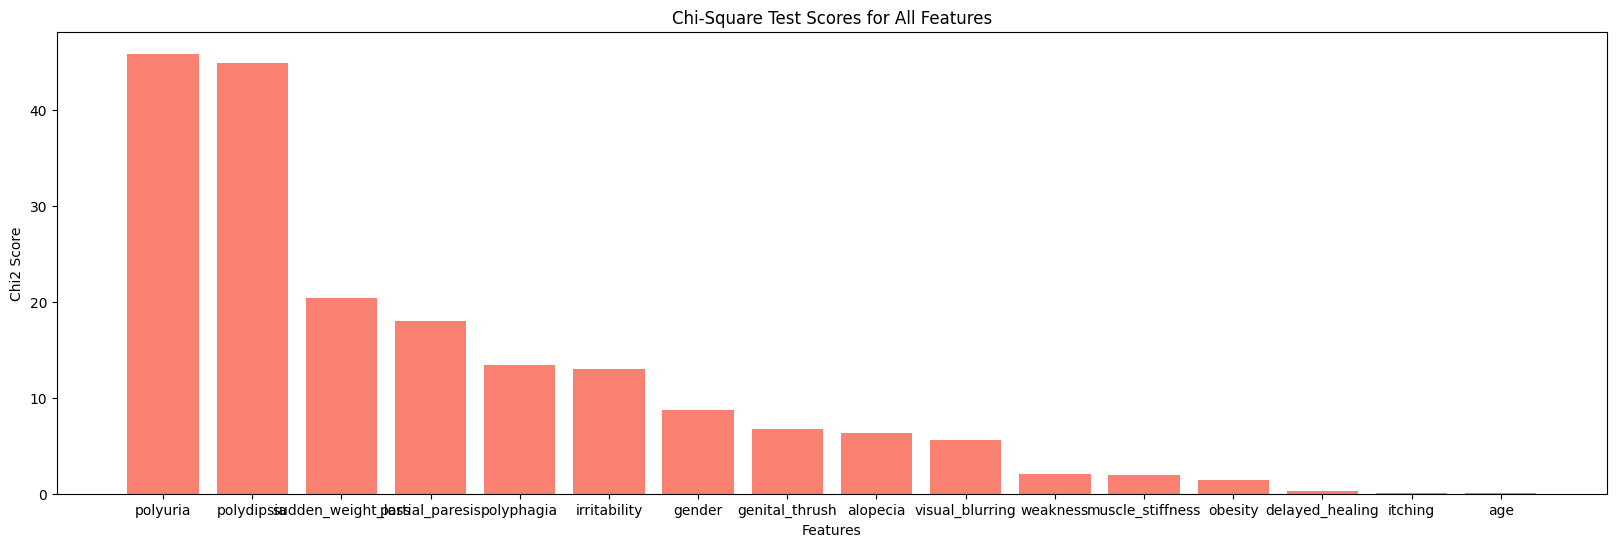

In [101]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X = data.drop(columns=['class'])
y = data['class']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
chi_scores, p_values = chi2(X_scaled, y)
chi2_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)
print("Chi-Square Test Results for All Columns:")
print(chi2_df)


plt.figure(figsize=(20, 6))
plt.bar(chi2_df['Feature'], chi2_df['Chi2 Score'], color='salmon')
plt.title('Chi-Square Test Scores for All Features')
plt.xlabel('Features')
plt.ylabel('Chi2 Score')
plt.show()

From the above tests we can observe that only few features are most relavent.....
- ployuria (Excessive urination)
- polydispia (Excessive thirst)
- sudden weight loss
- partial paresis
- gential trush
- gender
- ployphagia (Excessive hunger)
- alopecia (Hair loss)
- weakness
- visual blurring
- obesity
- muscle stiffness



# Model Selection

We have several machine learning models to choose from, each with its strengths:

- Random forests : An ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting. It works well with complex data and handles noise effectively.

- Decision Tree Classifier : A simple, interpretable model that makes decisions by splitting data based on feature values. It's easy to understand but can overfit if too complex.

- Logistic Regression :  A linear model used for binary classification that estimates the probability of an event. It’s efficient and works well when there’s a linear relationship between the features and the target.

- Support Vector Classifier :A model that finds the optimal boundary (hyperplane) separating classes, ideal for high-dimensional data. It’s particularly effective for non-linear problems with the use of kernels.

- Gradient Boosting Classifier:A boosting algorithm that builds models sequentially, optimizing for errors from previous models. It’s powerful, handles complex relationships, and works well with smaller datasets but may require careful hyperparameter tuning to avoid overfitting.

- Extra Trees Classifier: An ensemble method similar to Random Forests but with additional randomness. Splits are chosen randomly rather than based on the best criterion, making it faster and more robust to noise in data.

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

X = data.drop(columns=['class'])
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')
lr_precision = precision_score(y_test, y_pred_lr, average='weighted')
lr_recall = recall_score(y_test, y_pred_lr, average='weighted')

print(f"Logistic Regression - Accuracy: {lr_accuracy}, F1 Score: {lr_f1}, Precision: {lr_precision}, Recall: {lr_recall}")


Logistic Regression - Accuracy: 0.8421052631578947, F1 Score: 0.8444292549555709, Precision: 0.8480418217260323, Recall: 0.8421052631578947


### Support Vector Classifier

In [104]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)
y_pred_svc = svc_model.predict(X_test_scaled)

svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_f1 = f1_score(y_test, y_pred_svc, average='weighted')
svc_precision = precision_score(y_test, y_pred_svc, average='weighted')
svc_recall = recall_score(y_test, y_pred_svc, average='weighted')

print(f"Support Vector Classifier - Accuracy: {svc_accuracy}, F1 Score: {svc_f1}, Precision: {svc_precision}, Recall: {svc_recall}")

Support Vector Classifier - Accuracy: 0.9210526315789473, F1 Score: 0.9231791600212653, Precision: 0.9310053981106612, Recall: 0.9210526315789473


### Random Forest Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest - Accuracy: {rf_accuracy}, F1 Score: {rf_f1}, Precision: {rf_precision}, Recall: {rf_recall}")


Random Forest - Accuracy: 0.9342105263157895, F1 Score: 0.9356001482263373, Precision: 0.9403307283796037, Recall: 0.9342105263157895


### Decision Tree Classifier

In [106]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')

print(f"Decision Tree - Accuracy: {dt_accuracy}, F1 Score: {dt_f1}, Precision: {dt_precision}, Recall: {dt_recall}")



Decision Tree - Accuracy: 0.868421052631579, F1 Score: 0.8703577124629757, Precision: 0.8736487683856107, Recall: 0.868421052631579


### Gradient Boosting Classifier

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb, average='weighted')
gb_precision = precision_score(y_test, y_pred_gb, average='weighted')
gb_recall = recall_score(y_test, y_pred_gb, average='weighted')

print(f"Gradient Boosting - Accuracy: {gb_accuracy}, F1 Score: {gb_f1}, Precision: {gb_precision}, Recall: {gb_recall}")


Gradient Boosting - Accuracy: 0.881578947368421, F1 Score: 0.8840802668074068, Precision: 0.8896420707223349, Recall: 0.881578947368421


### Extra Trees

In [108]:
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier()
et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_test)
et_accuracy = accuracy_score(y_test, y_pred_et)
et_f1 = f1_score(y_test, y_pred_et, average='weighted')
et_precision = precision_score(y_test, y_pred_et, average='weighted')
et_recall = recall_score(y_test, y_pred_et, average='weighted')

print(f"Extra Trees - Accuracy: {et_accuracy}, F1 Score: {et_f1}, Precision: {et_precision}, Recall: {et_recall}")


Extra Trees - Accuracy: 0.8947368421052632, F1 Score: 0.8975722133616871, Precision: 0.9058704453441294, Recall: 0.8947368421052632


Comparision of all models accuracy

In [109]:
results = {
    "Model": ["Random Forest", "Decision Tree", "Logistic Regression", "Support Vector Classifier", "Gradient Boosting", "Extra Trees"],
    "Accuracy": [rf_accuracy, dt_accuracy, lr_accuracy, svc_accuracy, gb_accuracy, et_accuracy],
    "F1 Score": [rf_f1, dt_f1, lr_f1, svc_f1, gb_f1, et_f1],
    "Precision": [rf_precision, dt_precision, lr_precision, svc_precision, gb_precision, et_precision],
    "Recall": [rf_recall, dt_recall, lr_recall, svc_recall, gb_recall, et_recall]
}

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,F1 Score,Precision,Recall
0,Random Forest,0.934211,0.935600,0.940331,0.934211
1,Decision Tree,0.868421,0.870358,0.873649,0.868421
2,Logistic Regression,0.842105,0.844429,0.848042,0.842105
3,Support Vector Classifier,0.921053,0.923179,0.931005,0.921053
4,Gradient Boosting,0.881579,0.884080,0.889642,0.881579
5,Extra Trees,0.894737,0.897572,0.905870,0.894737


# Hyperparameter Tuning

Hyperparameter tuning is the process of finding the best combination of hyperparameters for a machine learning model to improve its performance.

### Logistic Regression with Hyperparameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_params = {
    "C": [0.1, 1, 10],
    "penalty": ["l2"]
}
lr_grid = GridSearchCV(estimator=lr_model, param_grid=lr_params, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train_scaled, y_train)
y_pred_lr_tuned = lr_grid.best_estimator_.predict(X_test_scaled)
lr_accuracy_tuned = accuracy_score(y_test, y_pred_lr_tuned)
lr_f1_tuned = f1_score(y_test, y_pred_lr_tuned, average='weighted')
lr_precision_tuned = precision_score(y_test, y_pred_lr_tuned, average='weighted')
lr_recall_tuned = recall_score(y_test, y_pred_lr_tuned, average='weighted')

print("Logistic Regression - Best Params:", lr_grid.best_params_)
print(f"Accuracy: {lr_accuracy_tuned}, F1 Score: {lr_f1_tuned}, Precision: {lr_precision_tuned}, Recall: {lr_recall_tuned}")


Logistic Regression - Best Params: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.881578947368421, F1 Score: 0.8840802668074068, Precision: 0.8896420707223349, Recall: 0.881578947368421


### Support Vector Classifier with Hyperparameter Tuning

In [111]:
from sklearn.svm import SVC

svc_model = SVC(random_state=42)
svc_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"]
}

svc_grid = GridSearchCV(estimator=svc_model, param_grid=svc_params, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid.fit(X_train_scaled, y_train)
y_pred_svc_tuned = svc_grid.best_estimator_.predict(X_test_scaled)
svc_accuracy_tuned = accuracy_score(y_test, y_pred_svc_tuned)
svc_f1_tuned = f1_score(y_test, y_pred_svc_tuned, average='weighted')
svc_precision_tuned = precision_score(y_test, y_pred_svc_tuned, average='weighted')
svc_recall_tuned = recall_score(y_test, y_pred_svc_tuned, average='weighted')

print("SVC - Best Params:", svc_grid.best_params_)
print(f"Accuracy: {svc_accuracy_tuned}, F1 Score: {svc_f1_tuned}, Precision: {svc_precision_tuned}, Recall: {svc_recall_tuned}")


SVC - Best Params: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.9605263157894737, F1 Score: 0.9608298927939494, Precision: 0.961540214171793, Recall: 0.9605263157894737


### Random Forest with Hyperparameter Tuning

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
y_pred_rf_tuned = rf_grid.best_estimator_.predict(X_test)
rf_accuracy_tuned = accuracy_score(y_test, y_pred_rf_tuned)
rf_f1_tuned = f1_score(y_test, y_pred_rf_tuned, average='weighted')
rf_precision_tuned = precision_score(y_test, y_pred_rf_tuned, average='weighted')
rf_recall_tuned = recall_score(y_test, y_pred_rf_tuned, average='weighted')

print("Random Forest - Best Params:", rf_grid.best_params_)
print(f"Accuracy: {rf_accuracy_tuned}, F1 Score: {rf_f1_tuned}, Precision: {rf_precision_tuned}, Recall: {rf_recall_tuned}")


Random Forest - Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9078947368421053, F1 Score: 0.9108597037765754, Precision: 0.9223942208462331, Recall: 0.9078947368421053


### Decision Tree with Hyperparameter Tuning

In [113]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
dt_grid = GridSearchCV(estimator=dt_model, param_grid=dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)
y_pred_dt_tuned = dt_grid.best_estimator_.predict(X_test)
dt_accuracy_tuned = accuracy_score(y_test, y_pred_dt_tuned)
dt_f1_tuned = f1_score(y_test, y_pred_dt_tuned, average='weighted')
dt_precision_tuned = precision_score(y_test, y_pred_dt_tuned, average='weighted')
dt_recall_tuned = recall_score(y_test, y_pred_dt_tuned, average='weighted')

print("Decision Tree - Best Params:", dt_grid.best_params_)
print(f"Accuracy: {dt_accuracy_tuned}, F1 Score: {dt_f1_tuned}, Precision: {dt_precision_tuned}, Recall: {dt_recall_tuned}")


Decision Tree - Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Accuracy: 0.8552631578947368, F1 Score: 0.8599223916489042, Precision: 0.8724458204334367, Recall: 0.8552631578947368


### Gradient Boosting with Hyperparameter Tuning

In [114]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 10]
}

gb_grid = GridSearchCV(estimator=gb_model, param_grid=gb_params, cv=5, scoring='accuracy', n_jobs=-1)
gb_grid.fit(X_train, y_train)
y_pred_gb_tuned = gb_grid.best_estimator_.predict(X_test)
gb_accuracy_tuned = accuracy_score(y_test, y_pred_gb_tuned)
gb_f1_tuned = f1_score(y_test, y_pred_gb_tuned, average='weighted')
gb_precision_tuned = precision_score(y_test, y_pred_gb_tuned, average='weighted')
gb_recall_tuned = recall_score(y_test, y_pred_gb_tuned, average='weighted')

print("Gradient Boosting - Best Params:", gb_grid.best_params_)
print(f"Accuracy: {gb_accuracy_tuned}, F1 Score: {gb_f1_tuned}, Precision: {gb_precision_tuned}, Recall: {gb_recall_tuned}")


Gradient Boosting - Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.868421052631579, F1 Score: 0.8719652667021089, Precision: 0.8807354925775978, Recall: 0.868421052631579


### Extra Trees Classifier with Hyperparameter Tuning

In [115]:
from sklearn.ensemble import ExtraTreesClassifier
et_model = ExtraTreesClassifier(random_state=42)
et_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

et_grid = GridSearchCV(estimator=et_model, param_grid=et_params, cv=5, scoring='accuracy', n_jobs=-1)
et_grid.fit(X_train, y_train)

y_pred_et_tuned = et_grid.best_estimator_.predict(X_test)
et_accuracy_tuned = accuracy_score(y_test, y_pred_et_tuned)
et_f1_tuned = f1_score(y_test, y_pred_et_tuned, average='weighted')
et_precision_tuned = precision_score(y_test, y_pred_et_tuned, average='weighted')
et_recall_tuned = recall_score(y_test, y_pred_et_tuned, average='weighted')

print("Extra Trees - Best Params:", et_grid.best_params_)
print(f"Accuracy: {et_accuracy_tuned}, F1 Score: {et_f1_tuned}, Precision: {et_precision_tuned}, Recall: {et_recall_tuned}")


Extra Trees - Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9210526315789473, F1 Score: 0.9231791600212653, Precision: 0.9310053981106612, Recall: 0.9210526315789473


In [116]:
results_tuned = {
    "Model": [
        "Random Forest",
        "Decision Tree",
        "Logistic Regression",
        "Support Vector Classifier",
        "Gradient Boosting",
        "Extra Trees"
    ],
    "Accuracy": [
        rf_accuracy_tuned,
        dt_accuracy_tuned,
        lr_accuracy_tuned,
        svc_accuracy_tuned,
        gb_accuracy_tuned,
        et_accuracy_tuned
    ],
    "F1 Score": [
        rf_f1_tuned,
        dt_f1_tuned,
        lr_f1_tuned,
        svc_f1_tuned,
        gb_f1_tuned,
        et_f1_tuned
    ],
    "Precision": [
        rf_precision_tuned,
        dt_precision_tuned,
        lr_precision_tuned,
        svc_precision_tuned,
        gb_precision_tuned,
        et_precision_tuned
    ],
    "Recall": [
        rf_recall_tuned,
        dt_recall_tuned,
        lr_recall_tuned,
        svc_recall_tuned,
        gb_recall_tuned,
        et_recall_tuned
    ]
}

results_df_tuned = pd.DataFrame(results_tuned)
results_df_tuned

,Model,Accuracy,F1 Score,Precision,Recall
0,Random Forest,0.907895,0.910860,0.922394,0.907895
1,Decision Tree,0.855263,0.859922,0.872446,0.855263
2,Logistic Regression,0.881579,0.884080,0.889642,0.881579
3,Support Vector Classifier,0.960526,0.960830,0.961540,0.960526
4,Gradient Boosting,0.868421,0.871965,0.880735,0.868421
5,Extra Trees,0.921053,0.923179,0.931005,0.921053


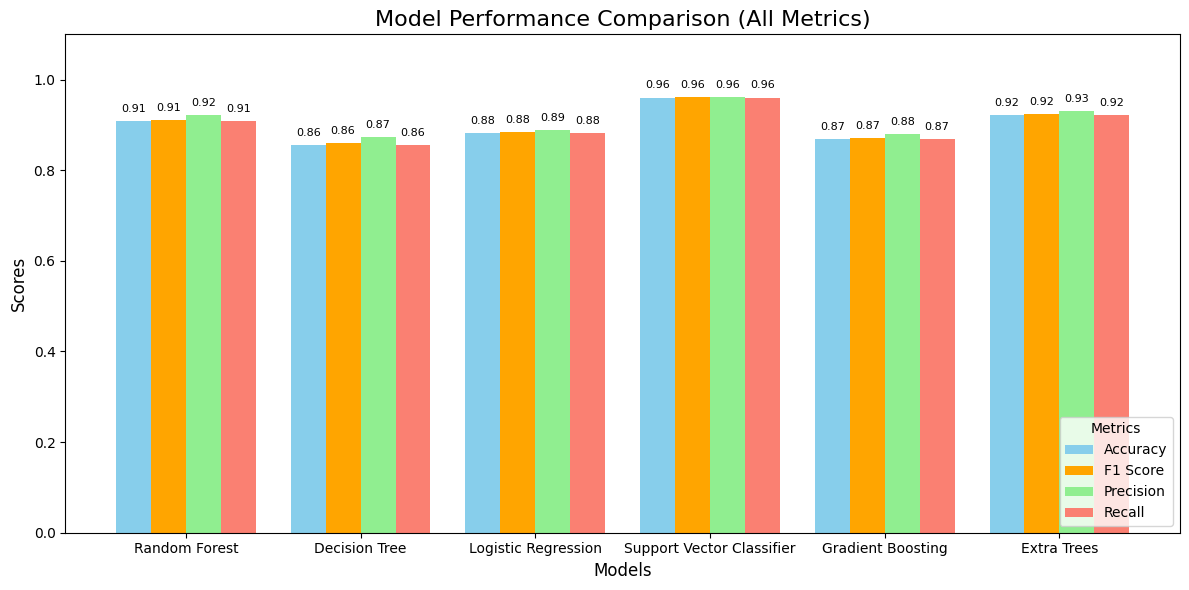

In [117]:
import matplotlib.pyplot as plt
import numpy as np


models = results_df_tuned["Model"]
accuracy = results_df_tuned["Accuracy"]
f1_score_values = results_df_tuned["F1 Score"]
precision = results_df_tuned["Precision"]
recall = results_df_tuned["Recall"]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(12, 6))


plt.bar(x - 1.5 * width, accuracy, width, label="Accuracy", color="skyblue")
plt.bar(x - 0.5 * width, f1_score_values, width, label="F1 Score", color="orange")
plt.bar(x + 0.5 * width, precision, width, label="Precision", color="lightgreen")
plt.bar(x + 1.5 * width, recall, width, label="Recall", color="salmon")


plt.title("Model Performance Comparison (All Metrics)", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(x, models, fontsize=10)
plt.ylim(0, 1.1)
plt.legend(title="Metrics", fontsize=10, loc='lower right',)


for i, model in enumerate(models):
    plt.text(x[i] - 1.5 * width, accuracy[i] + 0.02, f"{accuracy[i]:.2f}", ha='center', fontsize=8)
    plt.text(x[i] - 0.5 * width, f1_score_values[i] + 0.02, f"{f1_score_values[i]:.2f}", ha='center', fontsize=8)
    plt.text(x[i] + 0.5 * width, precision[i] + 0.02, f"{precision[i]:.2f}", ha='center', fontsize=8)
    plt.text(x[i] + 1.5 * width, recall[i] + 0.02, f"{recall[i]:.2f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()


# **Best Model Selection**
Based on the provided metrics and using F1 Score for model selection:

Model	F1 Score
Random Forest	0.910860
Decision Tree	0.859922
Logistic Regression	0.884080
Support Vector Classifier	0.960830
Gradient Boosting	0.871965
Extra Trees	0.923179
Best Model: Support Vector Classifier (SVC)
It has the highest F1 Score (0.960830) among all models, making it the most suitable choice for this dataset.

### **Why Use F1 Score for Model Selection?**
The F1 Score is the harmonic mean of Precision and Recall and is particularly useful in the following scenarios:

### **Imbalanced Datasets:**

- When classes are imbalanced, accuracy might be misleading, as it can show high values by predicting only the majority class. The F1 Score considers both false positives and false negatives, providing a balanced evaluation.
Trade-off Between Precision and Recall:

- F1 Score is ideal when you want a balance between Precision (minimizing false positives) and Recall (minimizing false negatives). This is often crucial in applications like medical diagnosis, fraud detection, or any scenario where both types of errors have significant consequences.
Balanced Metric:

- Accuracy may not reflect the model's performance effectively if the dataset has uneven class distributions or a model's prediction tendencies are skewed. F1 Score ensures both key aspects of classification performance are accounted for.
Summary

## Conclusion

**SVC** is the best model for the given data based on its F1 Score.

- F1 Score is chosen over other metrics because it provides a balanced measure, making it more reliable when handling potential trade-offs between false positives and false negatives.


